# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import random
import os
from skimage.io import imread
import cv2

# Constantes

In [4]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

In [2]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (32,32)

In [3]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

# Prepare Training Data

In [5]:
ROOT_PATH = os.getcwd()

TRAIN_PATH = ROOT_PATH + "\\Prof\\train\\" 
TEST_PATH = ROOT_PATH + "\\Prof\\test\\"

In [20]:
##### CODE #####

# Listar todos los archivos de la carpeta de train (TRAIN_PATH)
folders = os.listdir(TRAIN_PATH)

# Lista vacia
categories = []
listaFich = []
category = 0

# Iterar
for folder in folders:
    # Saco el nombre
    
    files = os.listdir(TRAIN_PATH + folder)
    
    for file in files:
    
        categories.append(folder)
    listaFich = listaFich + files
    category += 1
    
df = pd.DataFrame({
    'filename': listaFich,
    'category': categories
}) 

In [21]:
df.head()

,filename,category
0,0.jpg,buildings
1,10006.jpg,buildings
2,1001.jpg,buildings
3,10014.jpg,buildings
4,10018.jpg,buildings


In [30]:
file = df.iloc[0]["filename"]
folder = df.iloc[0]["category"]

Tamaño imagen original: (150, 150, 3)
Tamaño imagen reshape: (32, 32, 3)


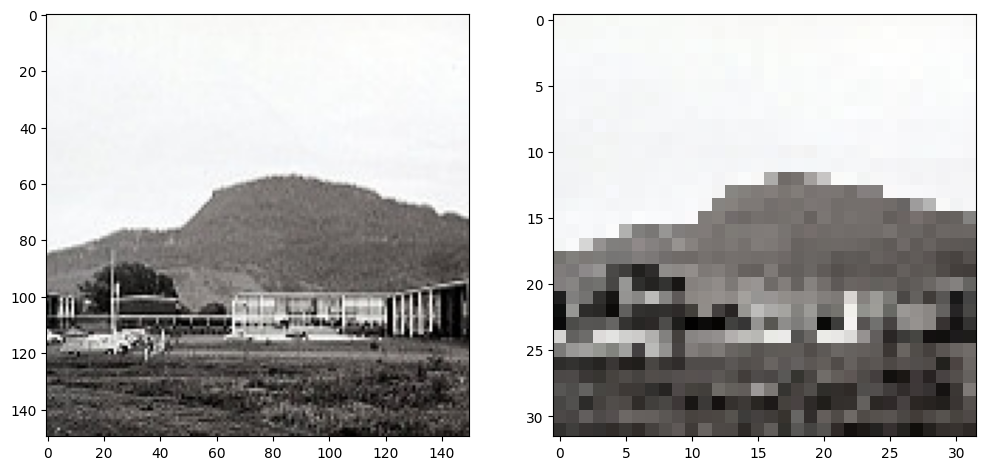

In [32]:
plt.figure(figsize=(12, 12))

for i in range(0, df.shape[0]):
    file = df.iloc[0]["filename"]
    folder = df.iloc[0]["category"]
    image = imread(TRAIN_PATH +"\\" +  folder +"\\" +  file)
    imagesmall = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

print("Tamaño imagen original:", image.shape)
print("Tamaño imagen reshape:", imagesmall.shape)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(imagesmall);

# Cargar los datos

In [33]:
def read_data(path, im_size):
    X = []
    Y = []

    ##### CODE #####
    # Iterar sobre todo lo que haya en path
    for i in range(0, df.shape[0]):
        file = df.iloc[0]["filename"]
        folder = df.iloc[0]["category"]
        
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + "\\"+ folder + "\\"+ file)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        X.append(smallimage)
        
        # category = file.split('.')[0]
        # # Miro si es perro y gato para guardar en Y
        # if category == 'dog':
        #     Y.append(1)
        # else:
        #     Y.append(0)
        Y.append(category)

    return np.array(X), np.array(Y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_WIDTH)
X_test, y_test = read_data(TEST_PATH, IMAGE_WIDTH)

print(X_train.shape)
print(X_test.shape)

FileNotFoundError: No such file: 'c:\Users\jaime\OneDrive\Documentos\GitHub\DS_PT_09_2023\Machine_Learning\5-Deep_Learning\2-Redes_Convolucionales\ejercicios\Prof\test\buildings\0.jpg'